In [2]:
import large_image


In [3]:
import os

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

#Some nice default configuration for plots
plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams['image.cmap'] = 'gray'

In [4]:
wsi_path = '/home/garner1/TCGA-A1-A0SF-01Z-00-DX1.7F252D89-EA78-419F-A969-1B7313D77499.svs'

In [5]:
ts = large_image.getTileSource(wsi_path)

Created LRU Cache for 'tilesource' with 82 maximum size
Using python for large_image caching


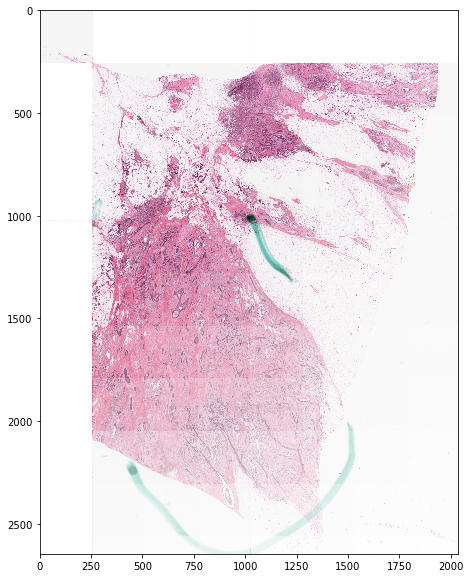

In [12]:
im_low_res, _ = ts.getRegion(
    scale=dict(magnification=1.25),
    format=large_image.tilesource.TILE_FORMAT_NUMPY
)

plt.imshow(im_low_res)

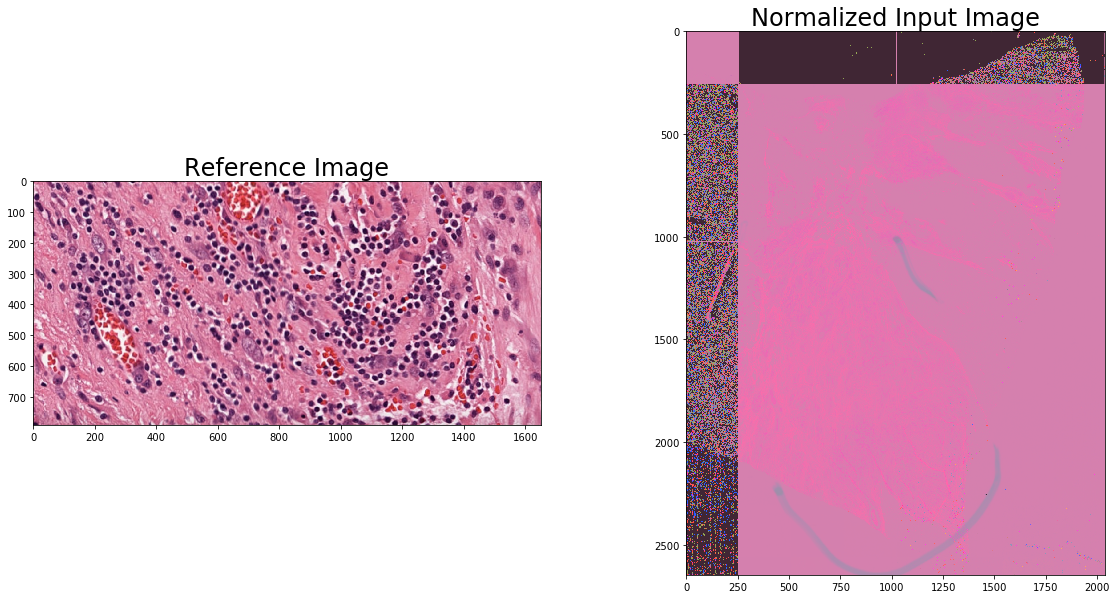

In [14]:
# Load reference image for normalization
ref_image_file = ('https://data.kitware.com/api/v1/file/'
                  '57718cc28d777f1ecd8a883c/download')  # L1.png

im_reference = skimage.io.imread(ref_image_file)[:, :, :3]

# get mean and stddev of reference image in lab space
mean_ref, std_ref = htk.preprocessing.color_conversion.lab_mean_std(im_reference)

# perform reinhard color normalization
im_input = im_low_res[:,:,:3]
im_nmzd = htk.preprocessing.color_normalization.reinhard(im_input, mean_ref, std_ref)

# Display results
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(im_reference)
_ = plt.title('Reference Image', fontsize=titlesize)

plt.subplot(1, 2, 2)
plt.imshow(im_nmzd)
_ = plt.title('Normalized Input Image', fontsize=titlesize)

In [15]:
im_nmzd.shape

(2647, 2039, 3)